# CSF 2024 Zip Code Demographic Work

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
income_zipcodes = pd.read_csv("2022_IncomeData_Zipcodes.csv", header=0)
income_zipcodes.columns = income_zipcodes.iloc[0]
income_zipcodes = income_zipcodes.iloc[1:]

In [48]:
income_zipcodes.head()

,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,Estimate!!Households!!Median income (dollars),Margin of Error!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households!!Mean income (dollars)
1,860Z200US00601,ZCTA5 00601,5341,314,17526,1697,23091,2165
2,860Z200US00602,ZCTA5 00602,12777,473,20260,1494,28695,1848
3,860Z200US00603,ZCTA5 00603,19624,628,17703,1223,30411,1778
4,860Z200US00606,ZCTA5 00606,1948,185,19603,3497,23849,2510
5,860Z200US00610,ZCTA5 00610,8781,465,22796,1701,31356,2619


In [49]:
cleaned_column_names = [
    'geography',
    'geographic_area_name',
    'total_households_estimate',
    'total_households_moe',
    'median_income_estimate',
    'median_income_moe',
    'mean_income_estimate',
    'mean_income_moe'
]

income_zipcodes.columns = cleaned_column_names
income_zipcodes.head()

,geography,geographic_area_name,total_households_estimate,total_households_moe,median_income_estimate,median_income_moe,mean_income_estimate,mean_income_moe
1,860Z200US00601,ZCTA5 00601,5341,314,17526,1697,23091,2165
2,860Z200US00602,ZCTA5 00602,12777,473,20260,1494,28695,1848
3,860Z200US00603,ZCTA5 00603,19624,628,17703,1223,30411,1778
4,860Z200US00606,ZCTA5 00606,1948,185,19603,3497,23849,2510
5,860Z200US00610,ZCTA5 00610,8781,465,22796,1701,31356,2619


In [50]:
income_zipcodes = income_zipcodes.drop(columns=['geography'])
income_zipcodes['geographic_area_name'] = income_zipcodes['geographic_area_name'].str.split(' ').str[-1]
for column in income_zipcodes.columns:
    if column != 'geographic_area_name':
        income_zipcodes[column] = pd.to_numeric(income_zipcodes[column], errors='coerce')
income_zipcodes = income_zipcodes.dropna()

income_zipcodes = income_zipcodes[income_zipcodes['total_households_estimate'] != "0"]

income_zipcodes.head()

,geographic_area_name,total_households_estimate,total_households_moe,median_income_estimate,median_income_moe,mean_income_estimate,mean_income_moe
1,00601,5341,314,17526.0,1697.0,23091.0,2165.0
2,00602,12777,473,20260.0,1494.0,28695.0,1848.0
3,00603,19624,628,17703.0,1223.0,30411.0,1778.0
4,00606,1948,185,19603.0,3497.0,23849.0,2510.0
5,00610,8781,465,22796.0,1701.0,31356.0,2619.0


In [51]:
sample_top_zipcodes = ["27712", "27705", "27615"]

income_zipcodes[income_zipcodes["geographic_area_name"].isin(sample_top_zipcodes)]

,geographic_area_name,total_households_estimate,total_households_moe,median_income_estimate,median_income_moe,mean_income_estimate,mean_income_moe
8697,27615,19176,858,102643.0,6662.0,138298.0,5907.0
8705,27705,21055,988,65935.0,5536.0,102237.0,5835.0
8709,27712,9393,645,85216.0,12929.0,127146.0,17957.0


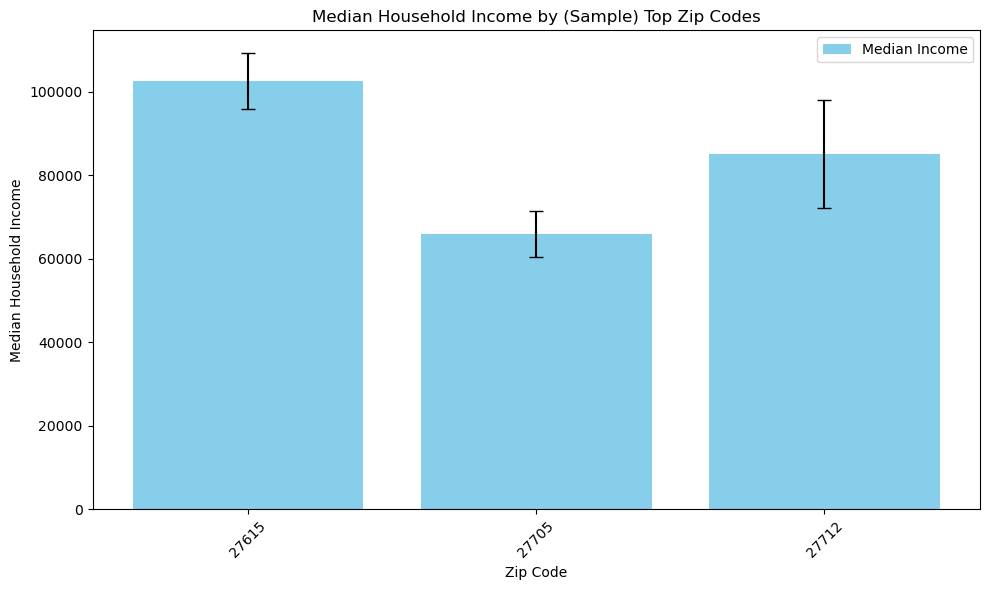

In [54]:
income_zipcodes['median_income_estimate'] = pd.to_numeric(income_zipcodes['median_income_estimate'])
income_zipcodes['median_income_moe'] = pd.to_numeric(income_zipcodes['median_income_moe'])

top_zipcodes = income_zipcodes[income_zipcodes["geographic_area_name"].isin(sample_top_zipcodes)]


plt.figure(figsize=(10, 6))

plt.bar(top_zipcodes['geographic_area_name'], top_zipcodes['median_income_estimate'], 
        yerr=top_zipcodes['median_income_moe'], capsize=5, color='skyblue', label='Median Income')

# Add labels and title
plt.xlabel('Zip Code')
plt.ylabel('Median Household Income')
plt.title('Median Household Income by (Sample) Top Zip Codes')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
